In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "toscana"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,9,Toscana,2,0,2,0,2,2,2,...,0.0,156.0,0.0,0.0,0.00,100.00,1.28,0.00,0.00,0.00
1,2020-02-26T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,67.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,47.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,9,Toscana,5,0,5,2,7,5,6,...,0.0,27.0,0.0,2.0,0.00,71.43,22.22,0.00,0.00,250.00
4,2020-02-29T17:00:00,9,Toscana,7,0,7,3,10,3,3,...,0.0,94.0,0.0,1.0,0.00,70.00,3.19,0.00,0.00,42.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2020-12-10T17:00:00,9,Toscana,1323,247,1570,20762,22332,-2273,517,...,75.0,9577.0,3182.0,-2243.0,15.73,7.03,5.40,16.25,-2.37,-9.24
290,2020-12-11T17:00:00,9,Toscana,1268,241,1509,19315,20824,-1508,657,...,50.0,12197.0,3487.0,-1447.0,15.97,7.25,5.39,18.84,-2.43,-6.75
291,2020-12-12T17:00:00,9,Toscana,1221,228,1449,17643,19092,-1732,574,...,35.0,12697.0,4008.0,-1672.0,15.73,7.59,4.52,14.32,-5.39,-8.32
292,2020-12-13T17:00:00,9,Toscana,1180,219,1399,16715,18114,-978,673,...,34.0,12416.0,4250.0,-928.0,15.65,7.72,5.42,15.84,-3.95,-5.12


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 14, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 445
Nuovi tamponi: 7132.0
Percentuale nuovi positivi/nuovi tamponi: 6.2 %
Nuovi guariti: 1038.0
Nuovi deceduti: 42.0
Variazione positivi ricoverati con sintomi: 13.0
Variazione positivi in terapia intensiva: -9.0
Variazione positivi in isolamento dimiciliare: -639.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 14, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-15T17:00:00,9,Toscana,276,46,322,7584,7906,479,581,...,2.0,11146.0,7879.0,432.0,14.29,4.07,5.21,7.37,0.00,6.45
1,2020-10-16T17:00:00,9,Toscana,308,51,359,8156,8515,609,755,...,2.0,11500.0,7525.0,572.0,14.21,4.22,6.57,10.03,10.87,7.70
2,2020-10-17T17:00:00,9,Toscana,344,50,394,8853,9247,732,879,...,2.0,13548.0,9220.0,697.0,12.69,4.26,6.49,9.53,-1.96,8.60
3,2020-10-18T17:00:00,9,Toscana,385,55,440,9546,9986,739,906,...,5.0,13380.0,8981.0,693.0,12.50,4.41,6.77,10.09,10.00,7.99
4,2020-10-19T17:00:00,9,Toscana,449,62,511,10340,10851,865,986,...,12.0,10557.0,7178.0,794.0,12.13,4.71,9.34,13.74,12.73,8.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-10T17:00:00,9,Toscana,1323,247,1570,20762,22332,-2273,517,...,75.0,9577.0,3182.0,-2243.0,15.73,7.03,5.40,16.25,-2.37,-9.24
57,2020-12-11T17:00:00,9,Toscana,1268,241,1509,19315,20824,-1508,657,...,50.0,12197.0,3487.0,-1447.0,15.97,7.25,5.39,18.84,-2.43,-6.75
58,2020-12-12T17:00:00,9,Toscana,1221,228,1449,17643,19092,-1732,574,...,35.0,12697.0,4008.0,-1672.0,15.73,7.59,4.52,14.32,-5.39,-8.32
59,2020-12-13T17:00:00,9,Toscana,1180,219,1399,16715,18114,-978,673,...,34.0,12416.0,4250.0,-928.0,15.65,7.72,5.42,15.84,-3.95,-5.12


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

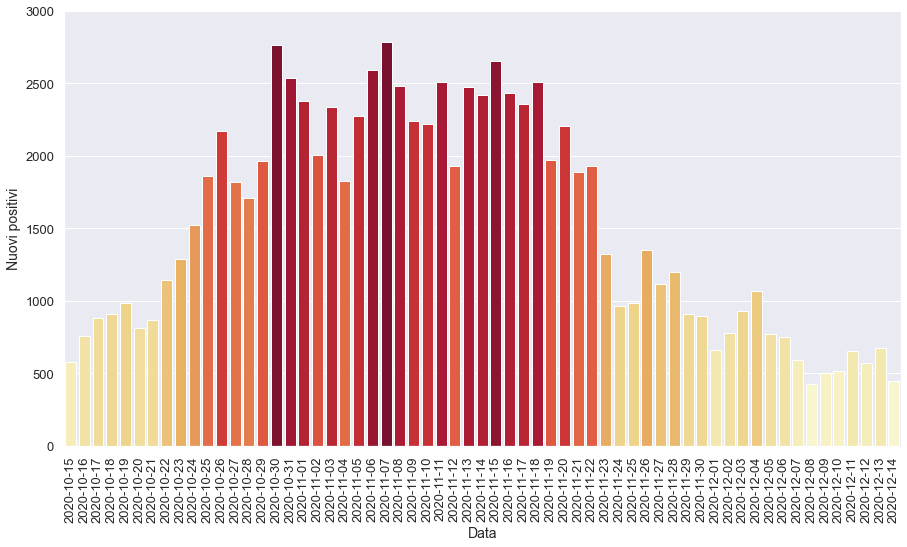

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

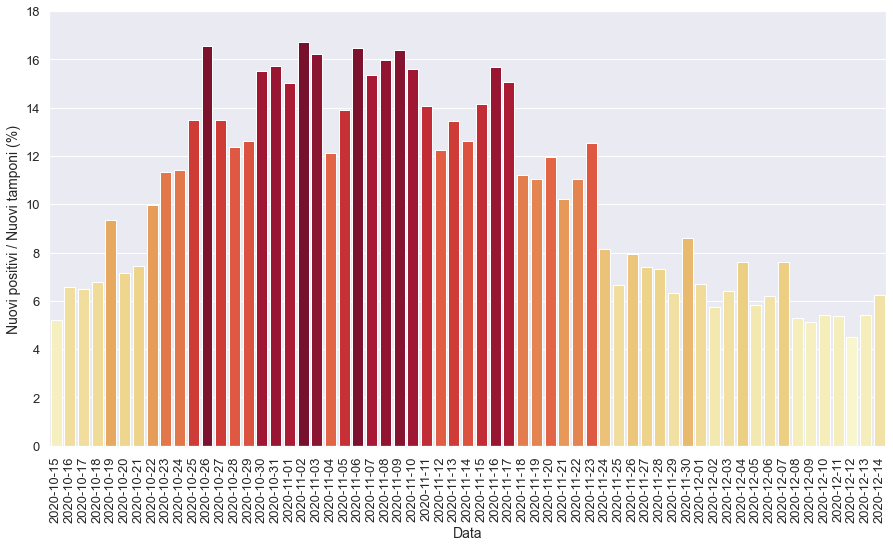

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

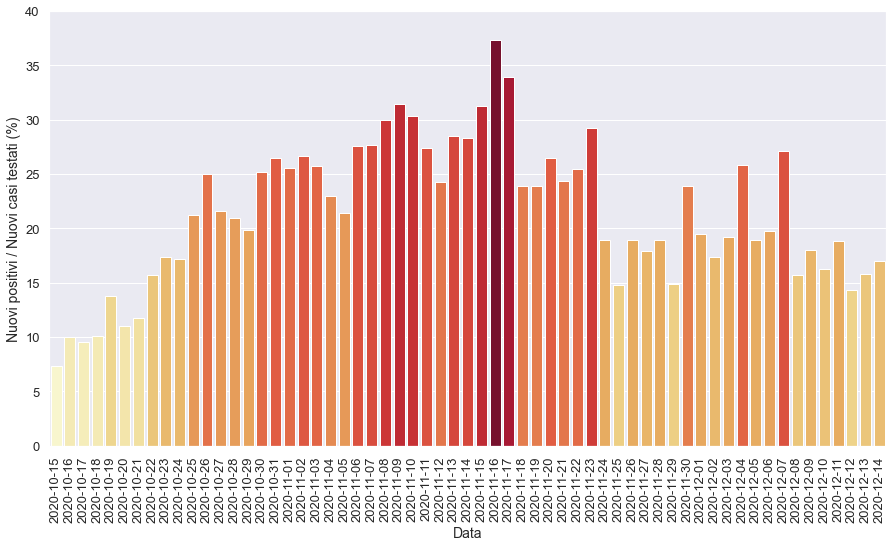

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

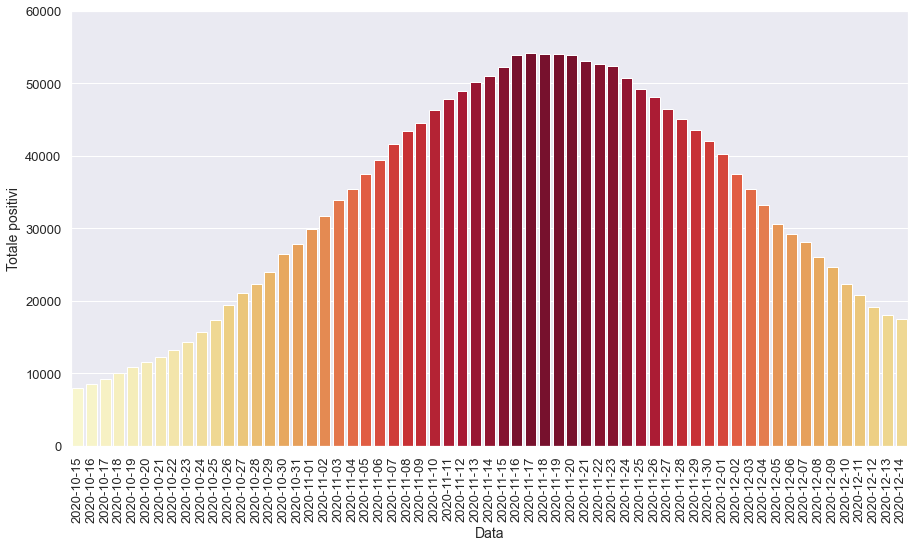

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

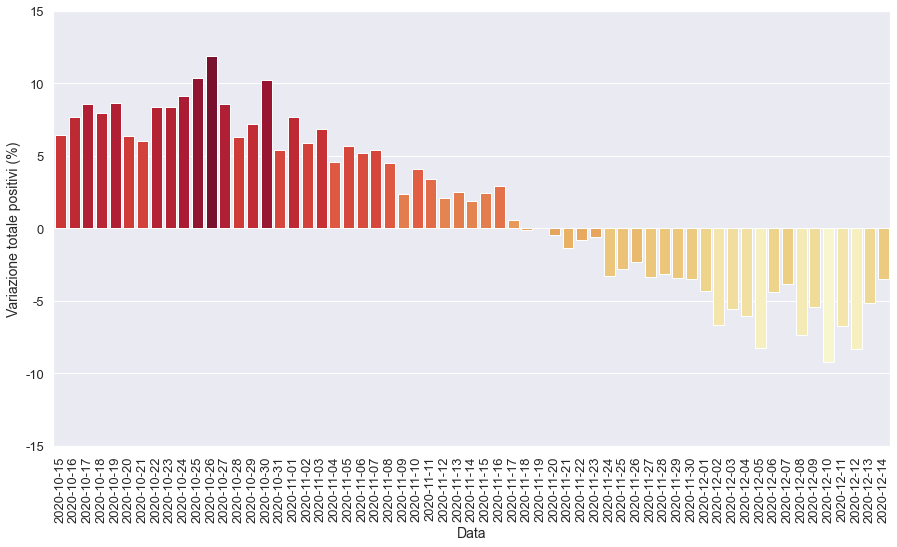

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

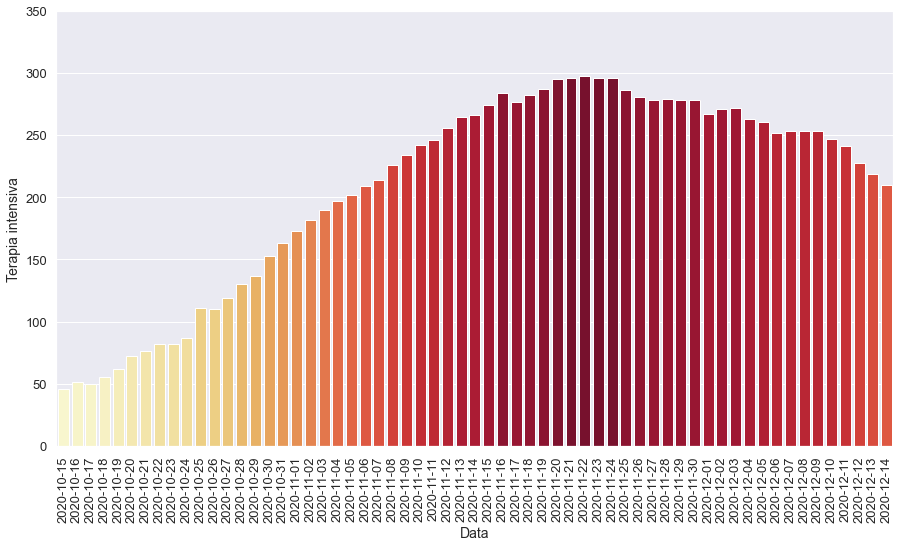

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

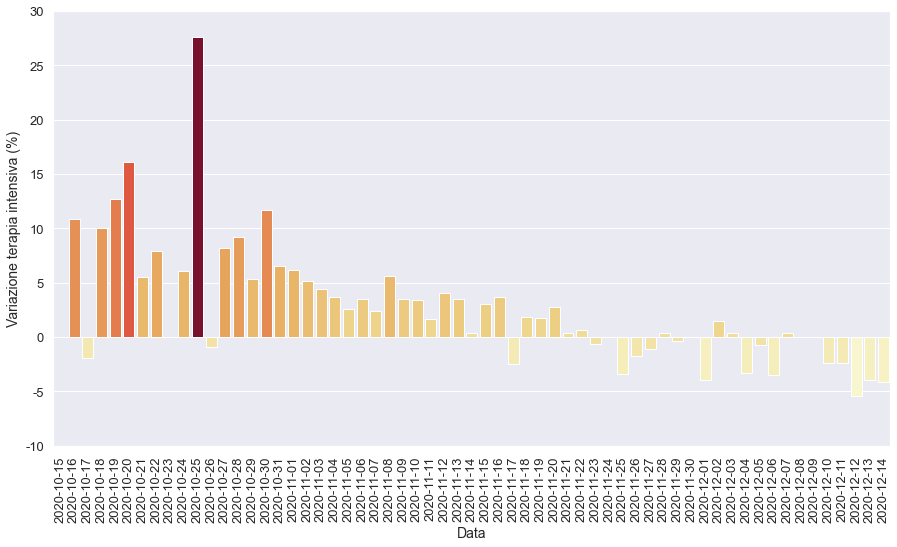

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

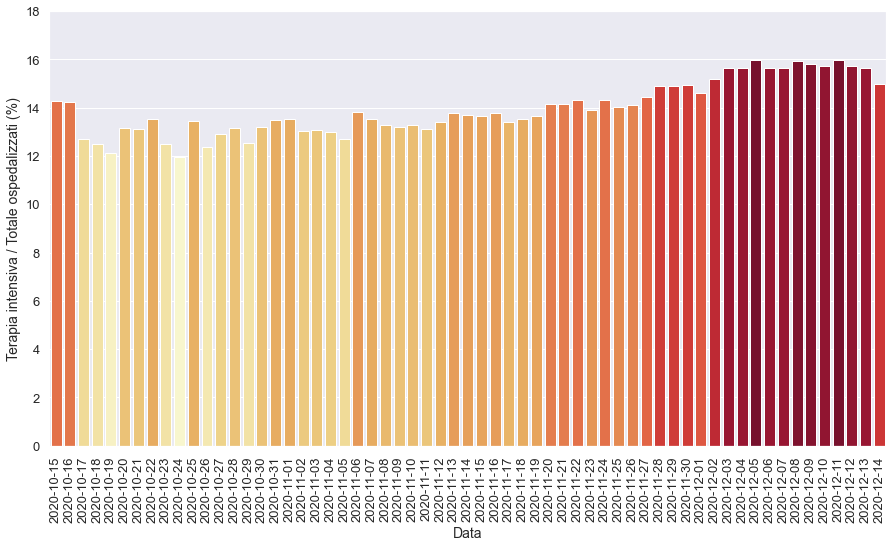

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

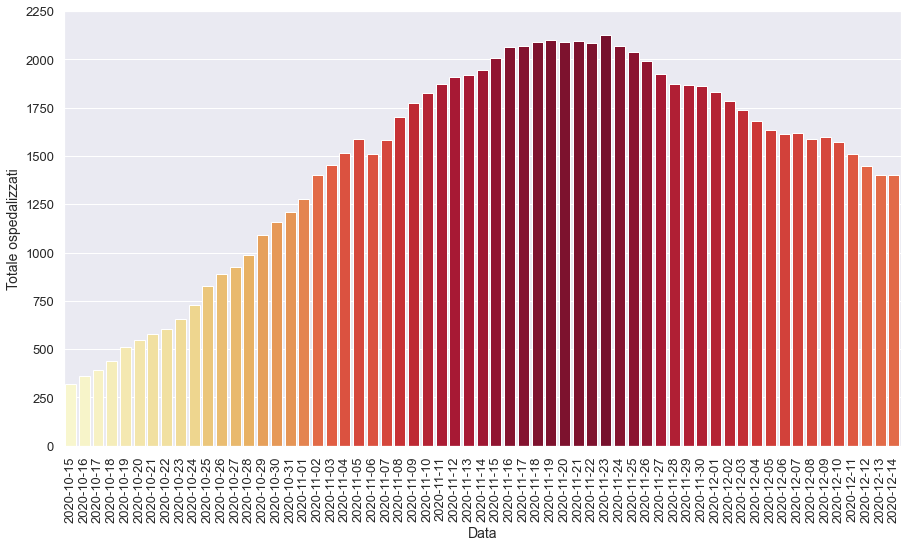

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

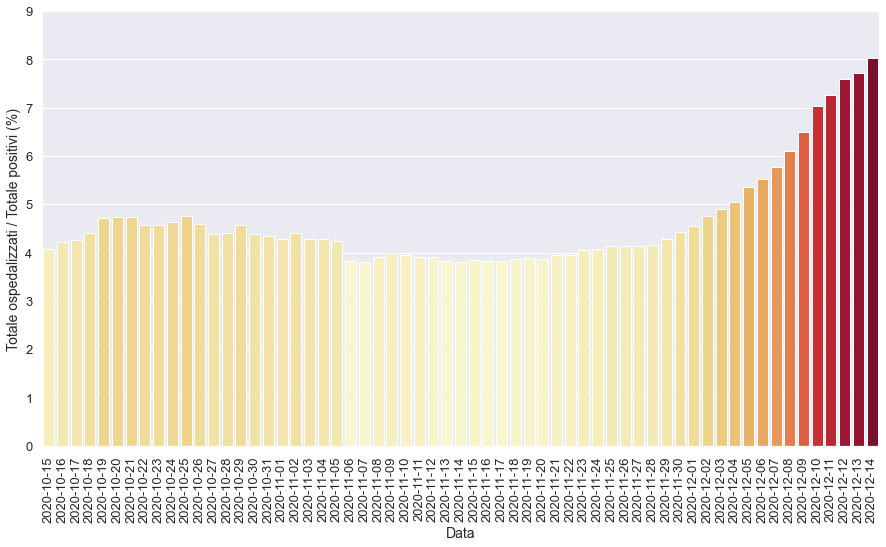

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

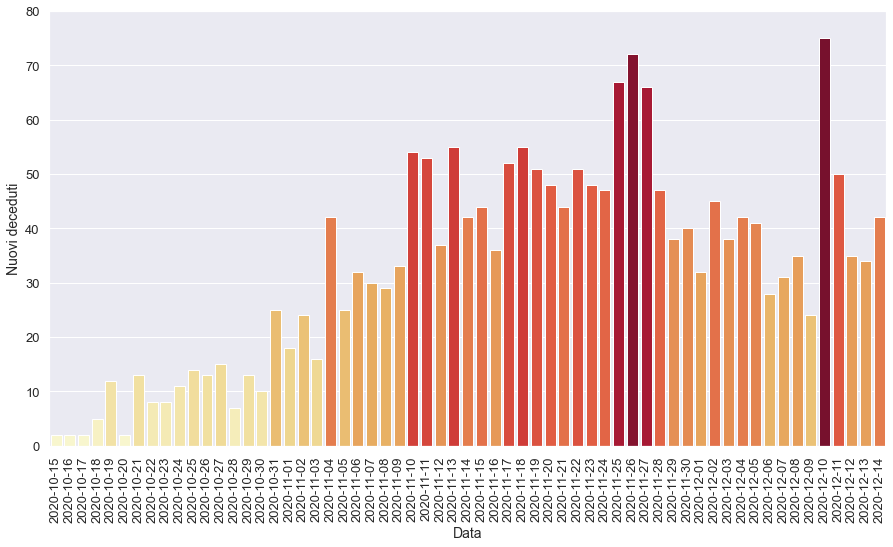

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

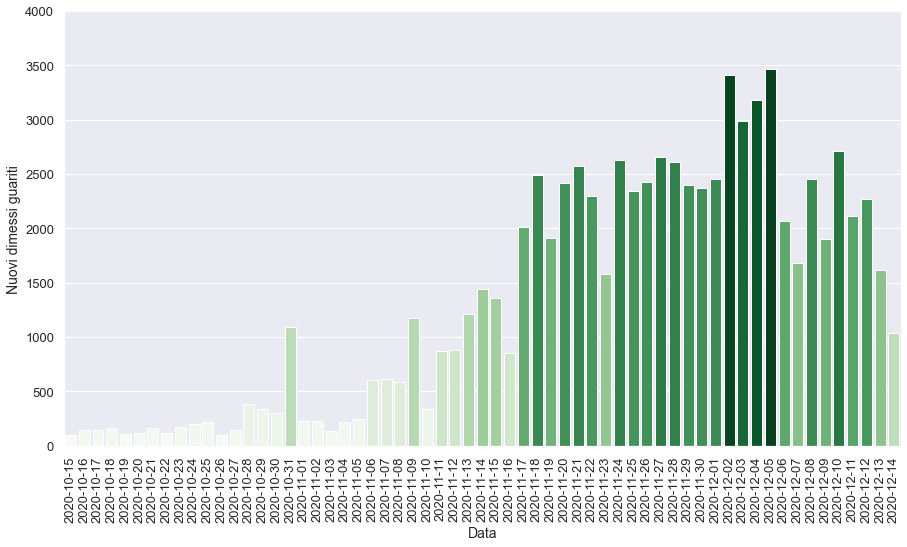

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-14T17:00:00,9,Toscana,1679,266,1945,49116,51061,932,2420,...,42.0,19184.0,8551.0,908.0,13.68,3.81,12.61,28.30,0.38,1.86
1,2020-11-15T17:00:00,9,Toscana,1734,274,2008,50300,52308,1247,2653,...,44.0,18737.0,8496.0,1184.0,13.65,3.84,14.16,31.23,3.01,2.44
2,2020-11-16T17:00:00,9,Toscana,1777,284,2061,51790,53851,1543,2433,...,36.0,15527.0,6513.0,1490.0,13.78,3.83,15.67,37.36,3.65,2.95
3,2020-11-17T17:00:00,9,Toscana,1792,277,2069,52083,54152,301,2361,...,52.0,15695.0,6961.0,293.0,13.39,3.82,15.04,33.92,-2.46,0.56
4,2020-11-18T17:00:00,9,Toscana,1805,282,2087,52023,54110,-42,2508,...,55.0,22365.0,10475.0,-60.0,13.51,3.86,11.21,23.94,1.81,-0.08
5,2020-11-19T17:00:00,9,Toscana,1814,287,2101,52023,54124,14,1972,...,51.0,17830.0,8244.0,0.0,13.66,3.88,11.06,23.92,1.77,0.03
6,2020-11-20T17:00:00,9,Toscana,1792,295,2087,51782,53869,-255,2207,...,48.0,18442.0,8340.0,-241.0,14.14,3.87,11.97,26.46,2.79,-0.47
7,2020-11-21T17:00:00,9,Toscana,1798,296,2094,51046,53140,-729,1892,...,44.0,18527.0,7766.0,-736.0,14.14,3.94,10.21,24.36,0.34,-1.35
8,2020-11-22T17:00:00,9,Toscana,1785,298,2083,50641,52724,-416,1929,...,51.0,17481.0,7590.0,-405.0,14.31,3.95,11.03,25.42,0.68,-0.78
9,2020-11-23T17:00:00,9,Toscana,1832,296,2128,50291,52419,-305,1323,...,48.0,10551.0,4531.0,-350.0,13.91,4.06,12.54,29.20,-0.67,-0.58


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

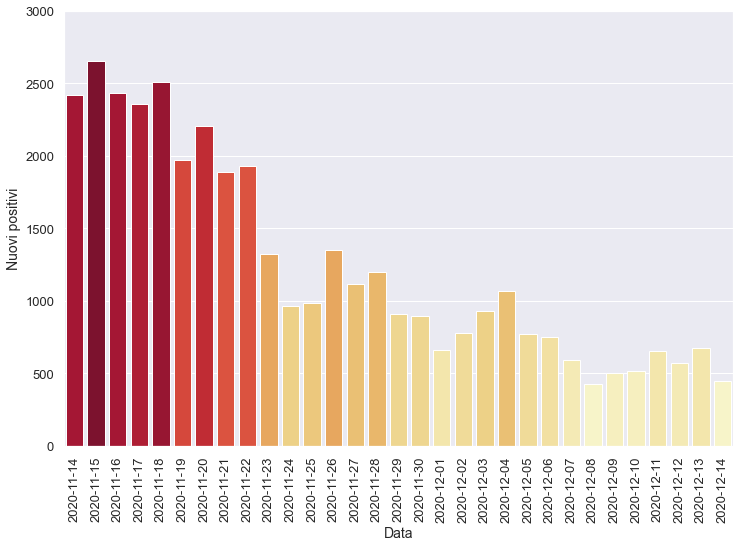

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

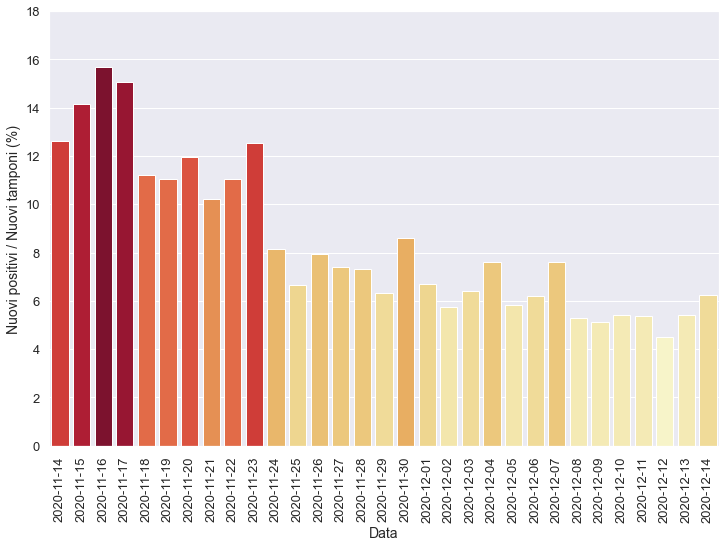

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

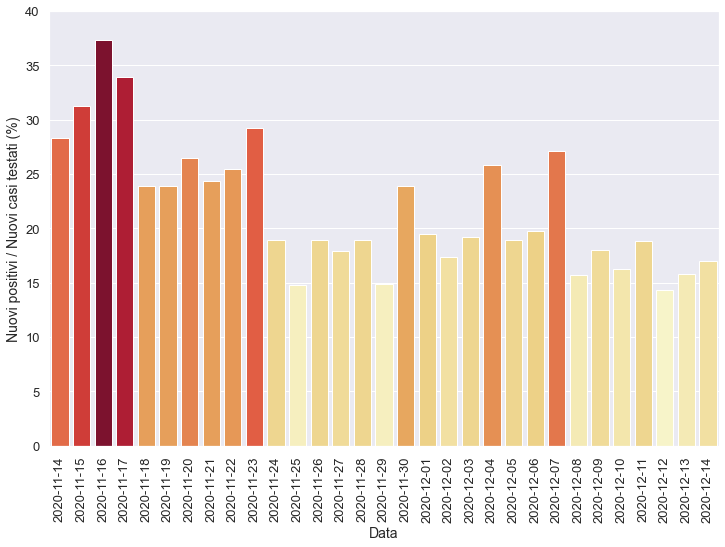

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

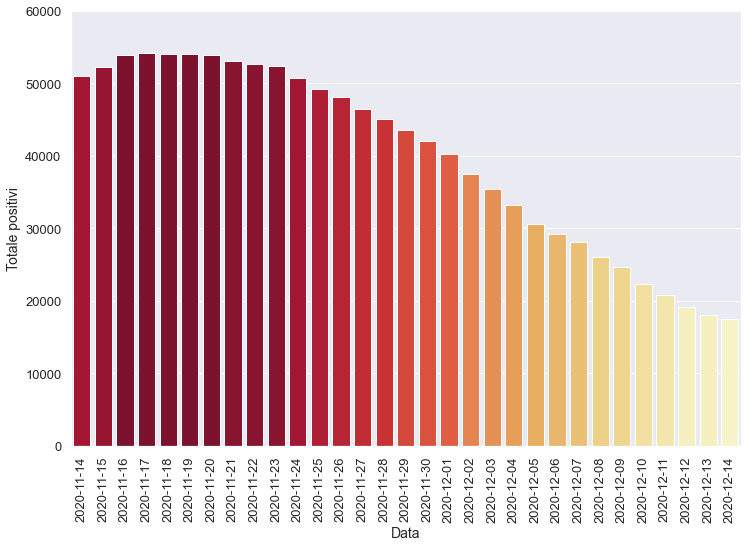

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

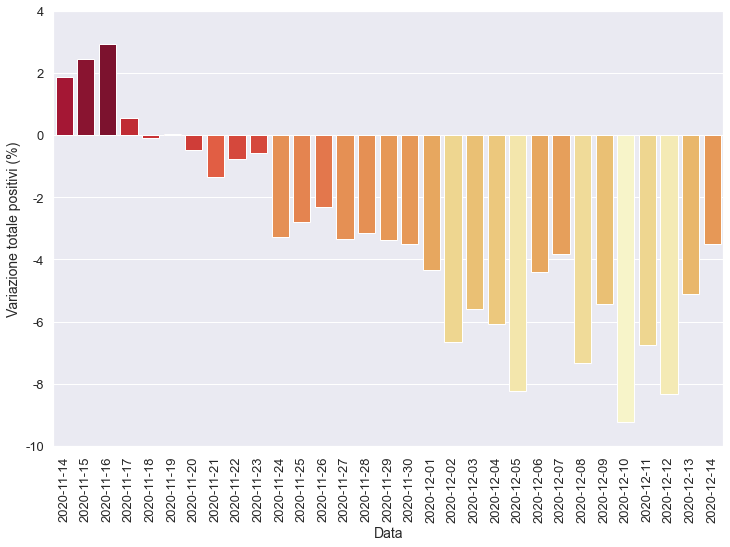

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

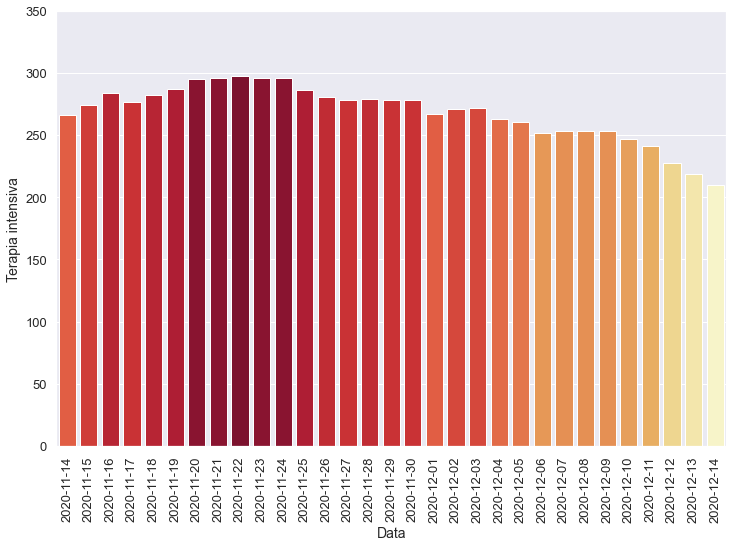

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

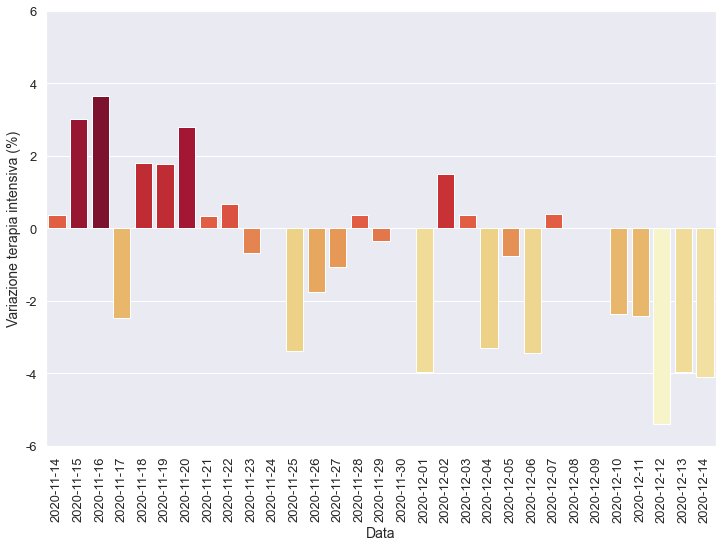

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

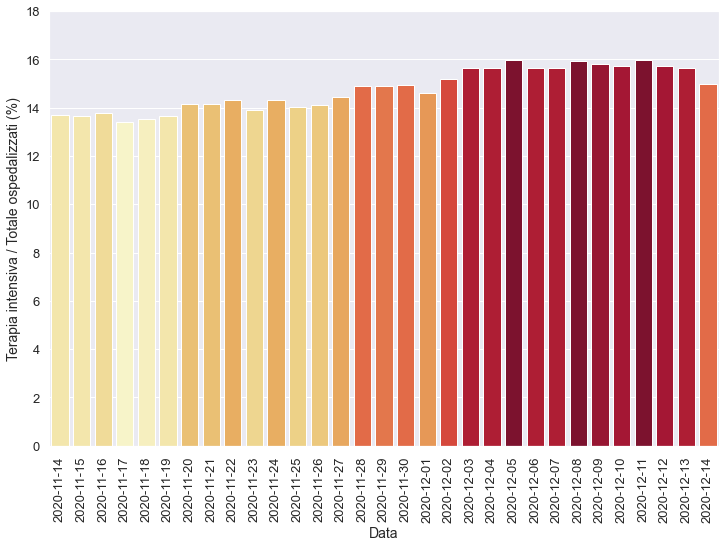

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

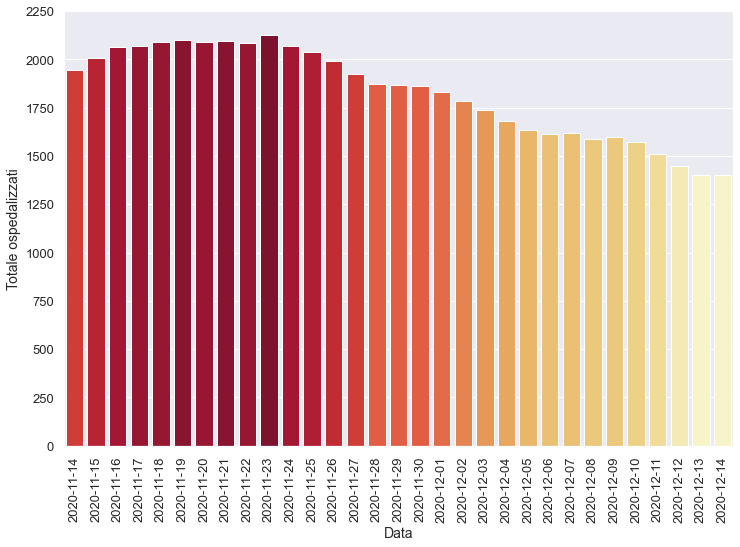

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

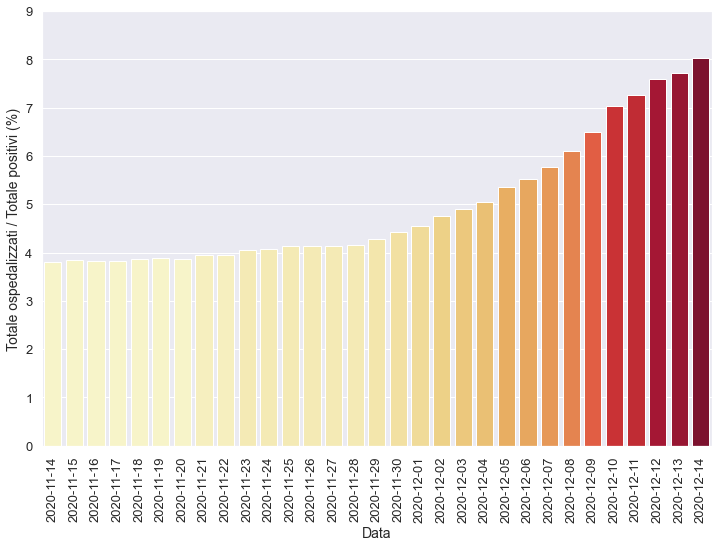

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

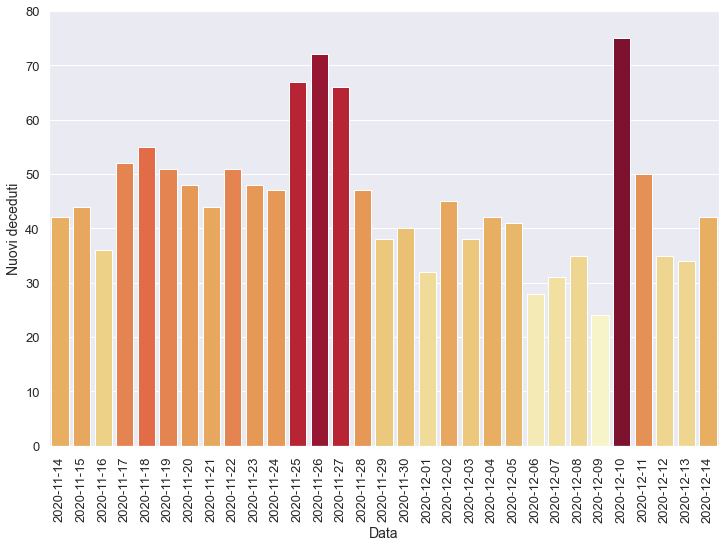

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

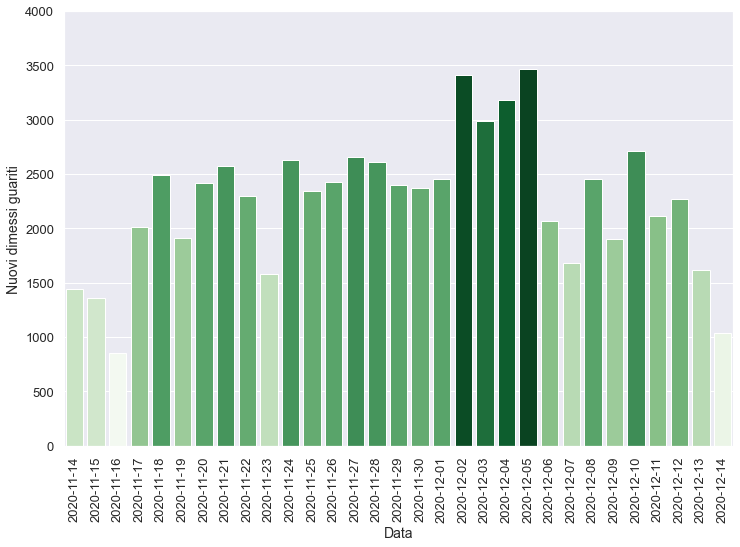

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-07T17:00:00,9,Toscana,1365,253,1618,26466,28084,-1115,593,...,31.0,7812.0,2185.0,-1121.0,15.64,5.76,7.59,27.14,0.40,-3.82
1,2020-12-08T17:00:00,9,Toscana,1335,253,1588,24436,26024,-2060,428,...,35.0,8110.0,2730.0,-2030.0,15.93,6.10,5.28,15.68,0.00,-7.34
2,2020-12-09T17:00:00,9,Toscana,1347,253,1600,23005,24605,-1419,505,...,24.0,9878.0,2798.0,-1431.0,15.81,6.50,5.11,18.05,0.00,-5.45
3,2020-12-10T17:00:00,9,Toscana,1323,247,1570,20762,22332,-2273,517,...,75.0,9577.0,3182.0,-2243.0,15.73,7.03,5.40,16.25,-2.37,-9.24
4,2020-12-11T17:00:00,9,Toscana,1268,241,1509,19315,20824,-1508,657,...,50.0,12197.0,3487.0,-1447.0,15.97,7.25,5.39,18.84,-2.43,-6.75
5,2020-12-12T17:00:00,9,Toscana,1221,228,1449,17643,19092,-1732,574,...,35.0,12697.0,4008.0,-1672.0,15.73,7.59,4.52,14.32,-5.39,-8.32
6,2020-12-13T17:00:00,9,Toscana,1180,219,1399,16715,18114,-978,673,...,34.0,12416.0,4250.0,-928.0,15.65,7.72,5.42,15.84,-3.95,-5.12
7,2020-12-14T17:00:00,9,Toscana,1193,210,1403,16076,17479,-635,445,...,42.0,7132.0,2614.0,-639.0,14.97,8.03,6.24,17.02,-4.11,-3.51


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

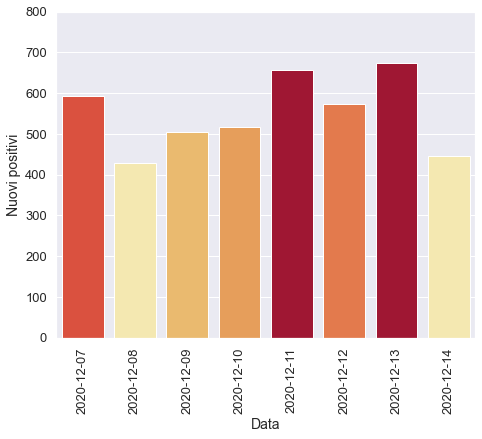

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

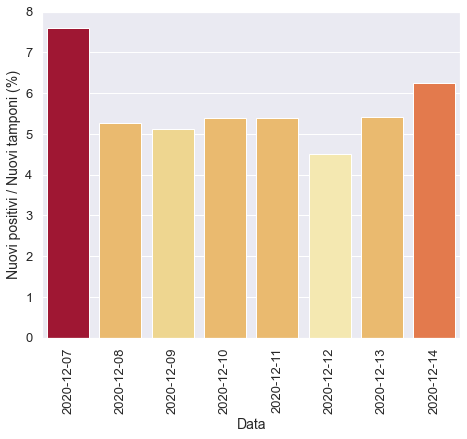

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

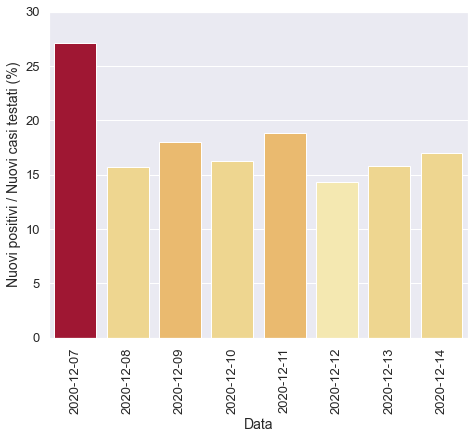

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

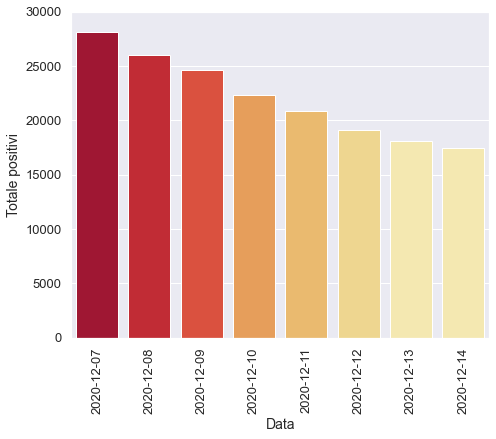

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

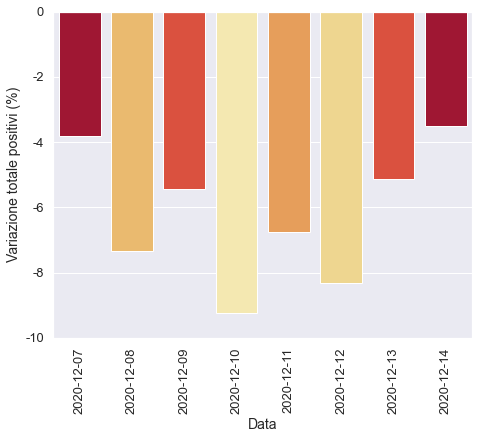

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

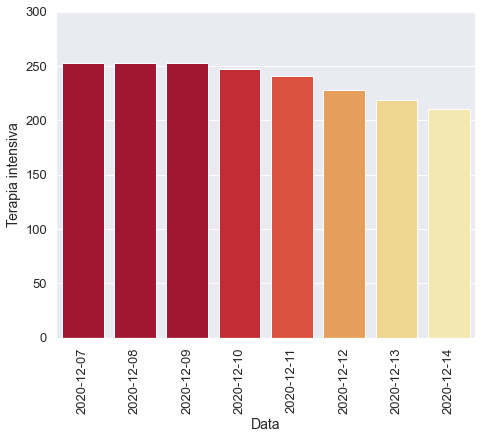

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

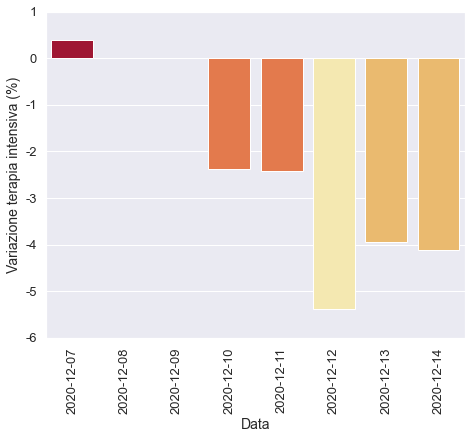

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

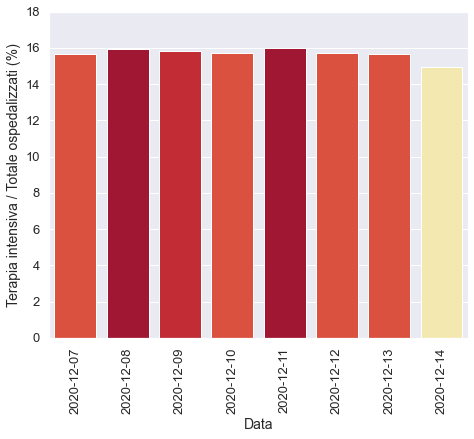

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

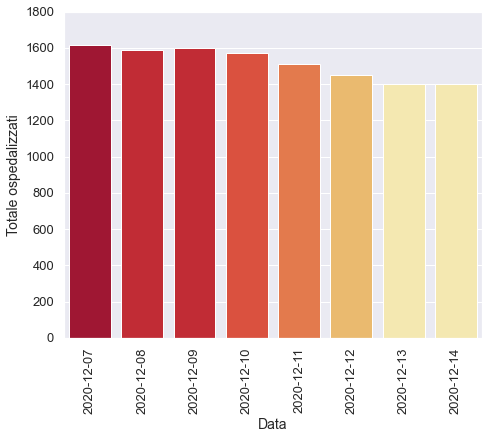

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

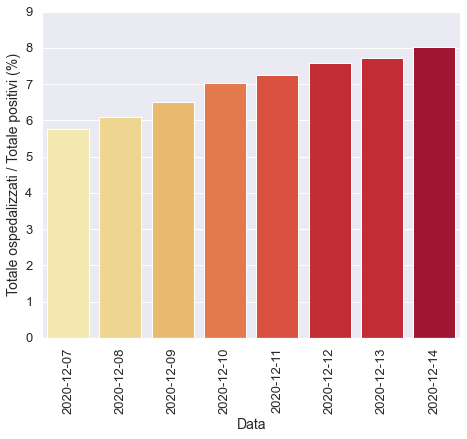

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

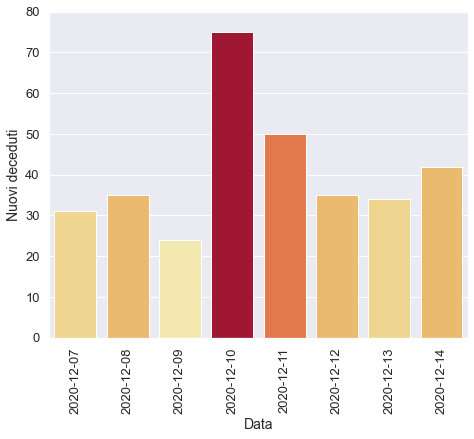

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

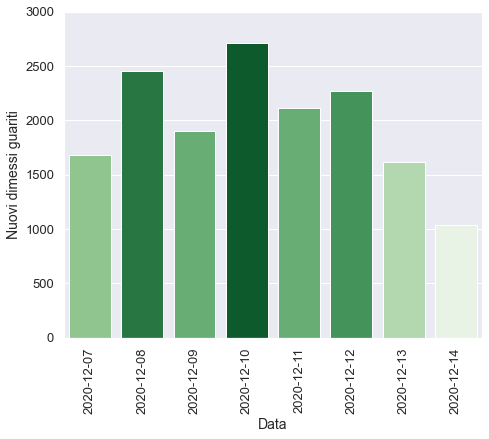

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)